In [1]:
import matplotlib.pyplot as plt
from matplotlib import colors
import pandas as pd
import numpy as np
import io

from google.colab import files 
uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['nyc-east-river-bicycle-counts.csv']))

N_points = len(df)

Saving nyc-east-river-bicycle-counts.csv to nyc-east-river-bicycle-counts.csv


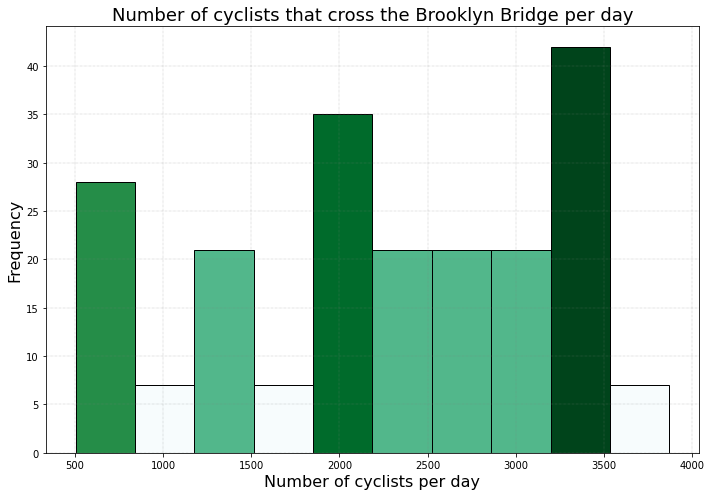

In [2]:
fig, axs = plt.subplots(1, 1, figsize =(10, 7),	tight_layout = True) # size of figure
axs.grid(b = True, color ='grey', linestyle ='-.', linewidth = 0.4,	alpha = 0.5)
N, bins, patches = axs.hist(df['Brooklyn Bridge'], bins = 10, edgecolor = "black") # split dataset into 10 sections

# Setting color
fracs = ((N**(1 / 5)) / N.max())
norm = colors.Normalize(fracs.min(), fracs.max())
for thisfrac, thispatch in zip(fracs, patches):
  color = plt.cm.BuGn(norm(thisfrac))
  thispatch.set_facecolor(color)

plt.xlabel("Number of cyclists per day", fontsize=16)
plt.ylabel("Frequency", fontsize=16)
plt.title('Number of cyclists that cross the Brooklyn Bridge per day', fontsize = 18)
plt.show()

In [3]:
# Poisson distribution function
def poisson(lam):
  el, n, u = np.exp(-lam), 0, np.random.uniform(0, 1)
  pp, fact, pow = el, 1, 1
  while u > pp:
    n += 1
    fact, pow = n * fact, lam * pow
    pp = pp + (pow / fact) * el
  return n

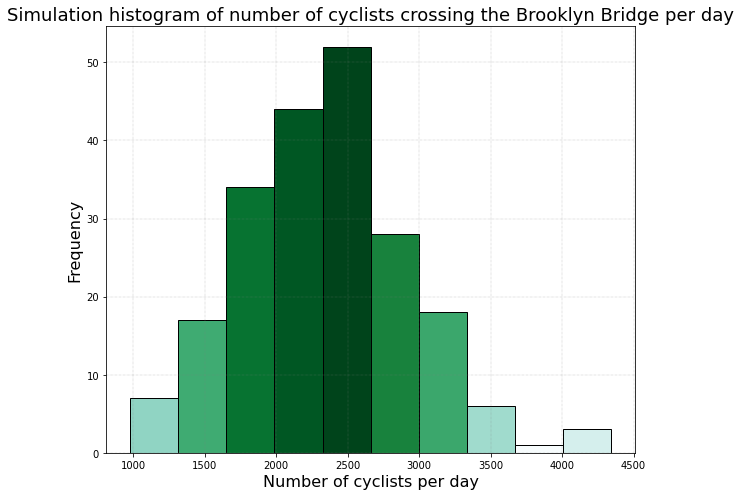

In [48]:
# Simulate frequency dataset from function above with lambda=25
mu = 21
data = [poisson(mu) for i in range(N_points)]
ratio = (max(df['Brooklyn Bridge']) - min(df['Brooklyn Bridge'])) / (max(data) - min(data))

for i in range(N_points):
  data[i] *= ratio # Scale the number of poisson count up to cyclists

fig2, axs2 = plt.subplots(1, 1, figsize =(10, 7),	tight_layout = True)
axs2.grid(b = True, color ='grey', linestyle ='-.', linewidth = 0.4,	alpha = 0.5)
N2, bins2, patches2 = axs2.hist(data, bins = 10, edgecolor = "black")

# Setting color
fracs2 = ((N2**(1 / 5)) / N2.max())
norm = colors.Normalize(fracs2.min(), fracs2.max())
for thisfrac, thispatch in zip(fracs2, patches2):
  color = plt.cm.BuGn(norm(thisfrac))
  thispatch.set_facecolor(color)

plt.xlabel("Number of cyclists per day", fontsize=16)
plt.ylabel("Frequency", fontsize=16)
plt.title('Simulation histogram of number of cyclists crossing the Brooklyn Bridge per day', fontsize = 18)
plt.show()